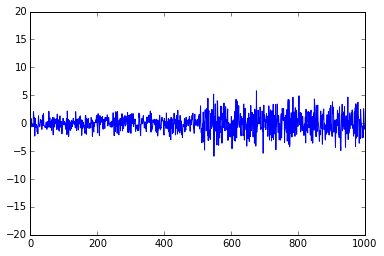

In [11]:
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 2
plt.figure(1)
plt.plot(data)
plt.ylim(-20, 20)
t_true = [500]
T = 200

Populating the interactive namespace from numpy and matplotlib


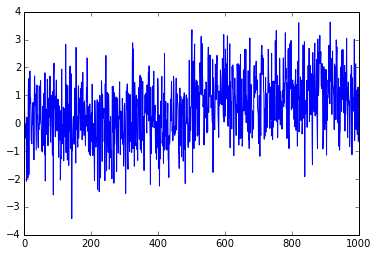

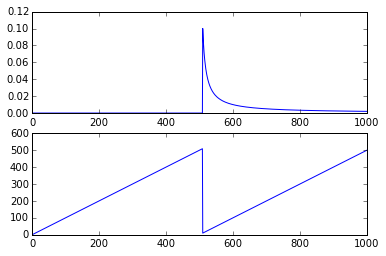

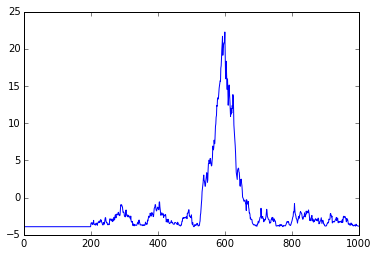

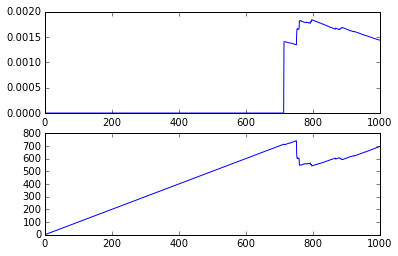

0.939664179104
0.8369835199
0.32125
0.313038246269
0.313038246269


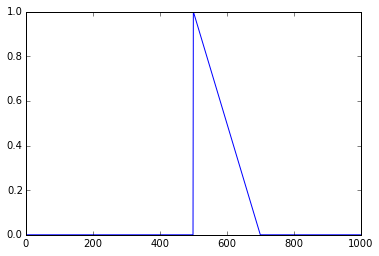

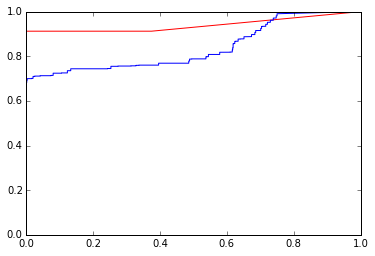

In [15]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 1.5)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.1)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

ins = adwin.ADWIN(a=1)
size4 = ins.transform(X=data, delta = 0.3)
score4 = ev.InvRunLen(size4[0])


ins = adwin.ADWIN(a=1)
size5 = ins.transform(X=data, delta = 0.5)
score5 = ev.InvRunLen(size4[0])
# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
x4 = []
y4 = []
p = [min(score4) - 1] + sorted(score4)
for beta in p:
    e = ev.B(score4, beta, t_true, T)
    f  = ev.N(score4, beta, t_true, T)
    g = ev.supB(score4, t_true, T)
    h = ev.supN(score4, t_true, T)
    x4.append(f/h)
    y4.append(e/g)
print(auc(x4,y4))
x4 = []
y4 = []
p = [min(score5) - 1] + sorted(score5)
for beta in p:
    e = ev.B(score5, beta, t_true, T)
    f  = ev.N(score5, beta, t_true, T)
    g = ev.supB(score5, t_true, T)
    h = ev.supN(score5, t_true, T)
    x4.append(f/h)
    y4.append(e/g)
print(auc(x4,y4))

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 640.  546.  879.  535.  699.]
[  640.  1186.  2065.  2600.  3299.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


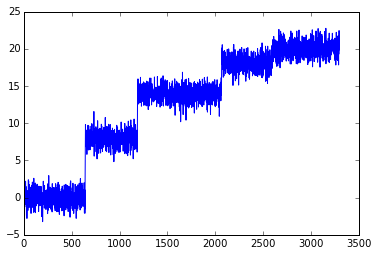

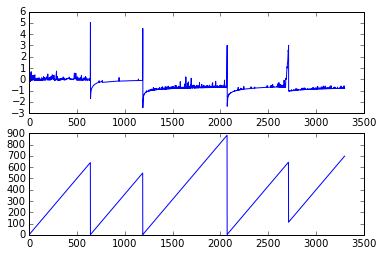

0.254620348139


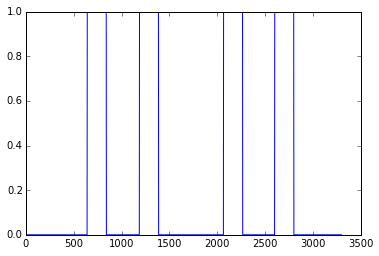

In [7]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * H(x - cusum[i - 1])
        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 3)
#score = ev.InvRunLen(size[0])
score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()


# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
t_true = cusum[:(n-1)]
#t = np.ndarray.tolist(cusum[:(n-1)])
#t_true = [0]
#t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 342.  451.  522.  277.  405.]
[  342.   793.  1315.  1592.  1997.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


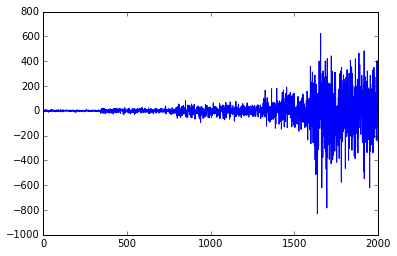

0.953830491474


In [10]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
        s = s  +  1 * H(x - cusum[i - 1]) ###
#        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 4 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 3)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()


# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

単変化(平均, $\Delta = 1$)

Populating the interactive namespace from numpy and matplotlib


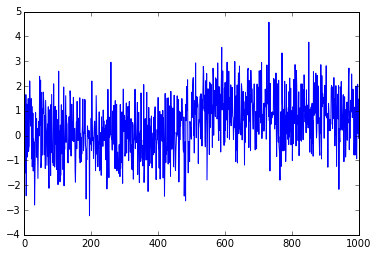

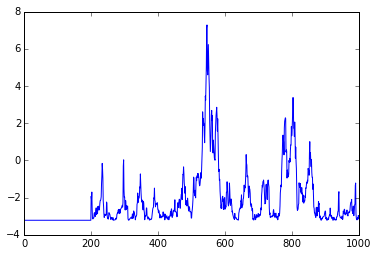

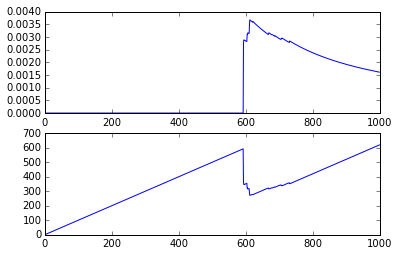

0.761666666667
0.908011111111
0.319072222222


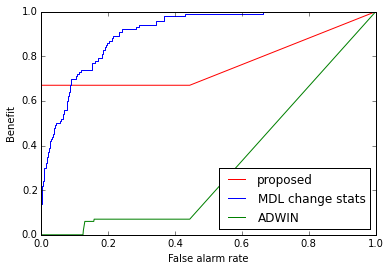

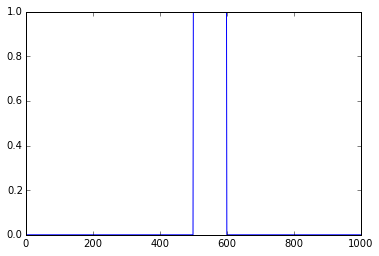

In [11]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 1
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 100

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=50, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

単変化(平均, $\Delta = 5$)

Populating the interactive namespace from numpy and matplotlib


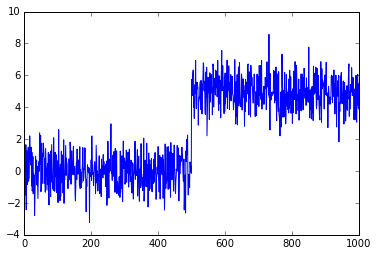

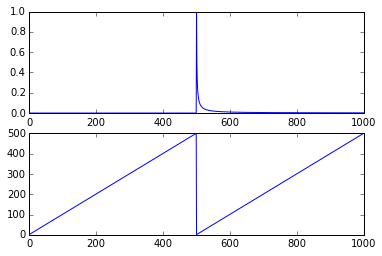

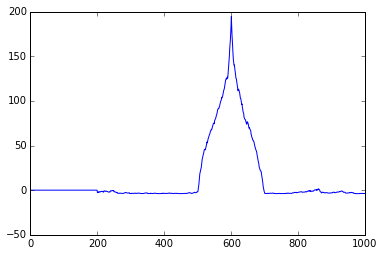

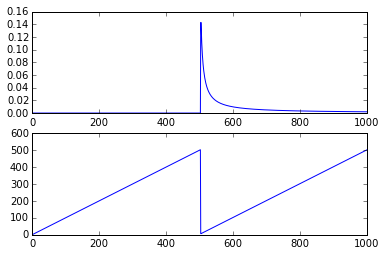

1.0
0.99399375
0.9896875


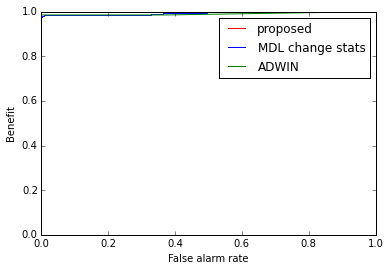

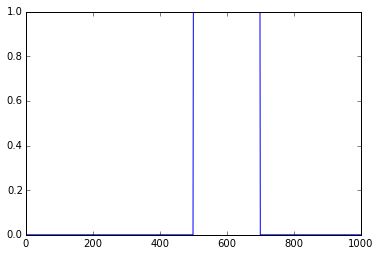

In [3]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] + 5
plt.figure(1)
plt.plot(data)
t_true = [500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000])) * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

単変化(分散, $\Delta = 2$)

Populating the interactive namespace from numpy and matplotlib


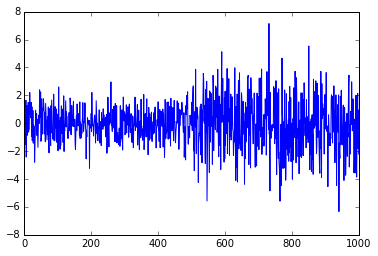

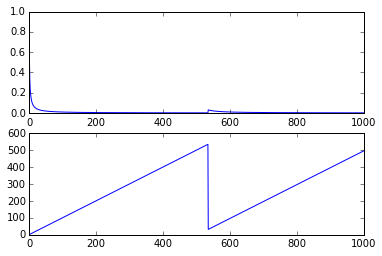

0.8406710199
0.794112603648
0.75


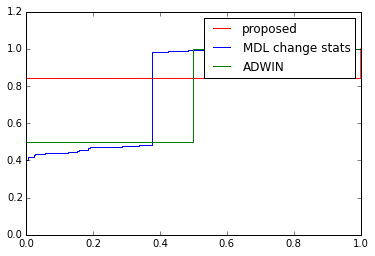

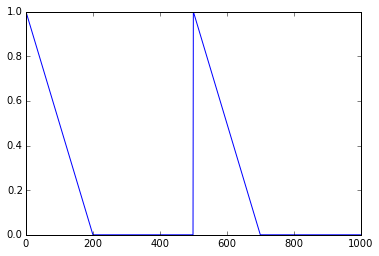

In [17]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 2
plt.figure(1)
plt.plot(data)
t_true = [0, 500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]) + 1) 
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

単変化(分散, $\Delta = 5$)

Populating the interactive namespace from numpy and matplotlib


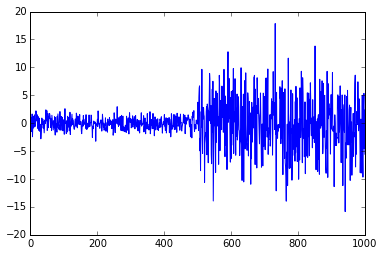

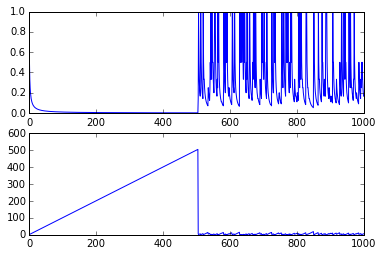

0.980248134328
0.978903731343
0.628821932007


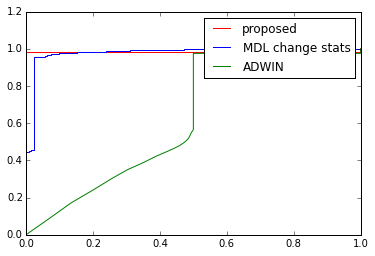

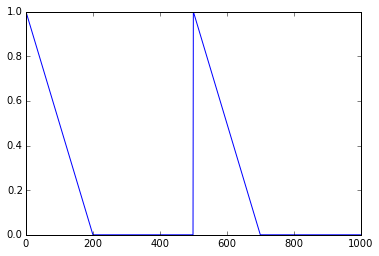

In [18]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=1000)
for i in range(500,1000):
    data[i] = data[i] * 5
plt.figure(1)
plt.plot(data)
t_true = [0, 500]
T = 200

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(1000) * (min(score2[200:1000]))  * 0
score2_[200:1000] = score2[200:1000]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = ev.InvRunLen(size3[0])
#score = size3[1]
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# benefit は 三角形
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e = ev.B(score3, beta, t_true, T)
    f  = ev.N(score3, beta, t_true, T)
    g = ev.supB(score3, t_true, T)
    h = ev.supN(score3, t_true, T)
    x3.append(f/h)
    y3.append(e/g)
print(auc(x3,y3))
plt.plot(x3,y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(3)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [22]:
i = 99
print(x[i])
print(y[i])

0.84
0.980248756219


多重変化(平均、abrupt)

Populating the interactive namespace from numpy and matplotlib
[ 273.  807.  201.  464.  537.]
[  273.  1080.  1281.  1745.  2282.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.835155998479
0.718952033902
0.833703689043


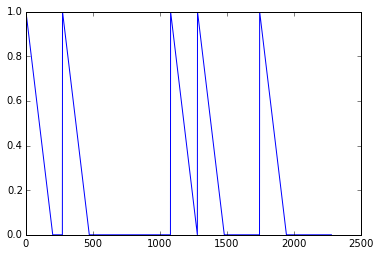

In [24]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * H(x - cusum[i - 1])
        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

多重変化(分散、abrupt)

Populating the interactive namespace from numpy and matplotlib
[ 718.  446.  827.  848.  587.]
[  718.  1164.  1991.  2839.  3426.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


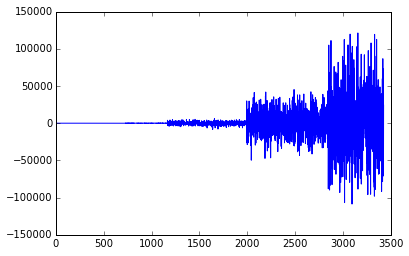

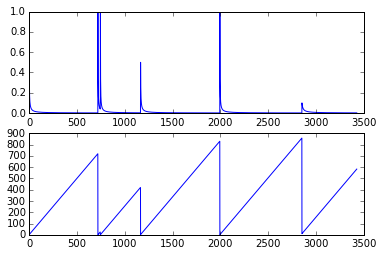

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:62: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:63: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


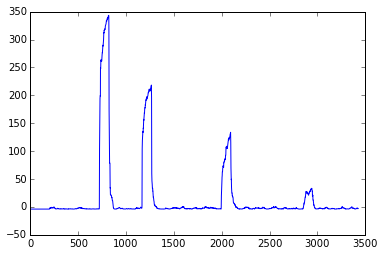

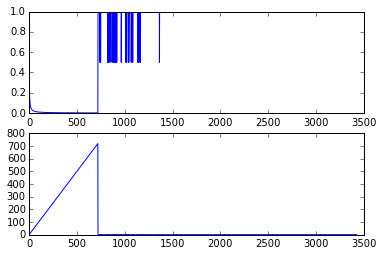

0.966233022849
0.744146657479
0.525882092013


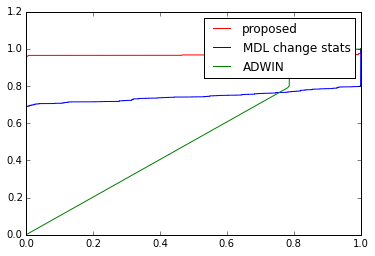

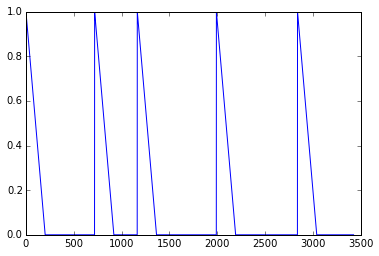

In [26]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def H(x):
    return 0.5 * (np.sign(x) + 1)
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * H(x - cusum[i - 1]) ###
        s = s + (5-i) * H(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 2 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [48]:
i = 600
print(x[i])
print(y[i])

0.759274525969
0.966975124378


多重変化(平均、gradual)

Populating the interactive namespace from numpy and matplotlib
[ 468.  548.  940.  932.  112.]
[  468.  1016.  1956.  2888.  3000.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


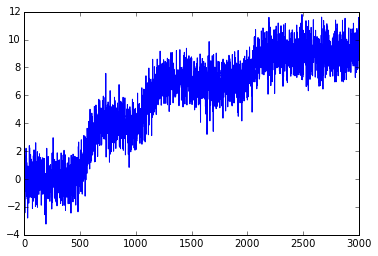

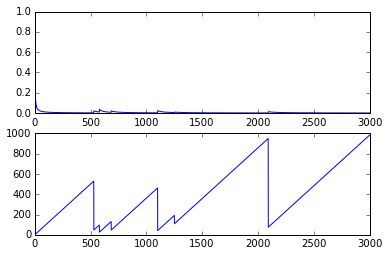

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


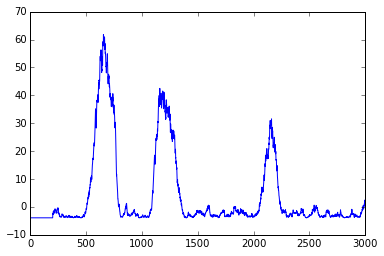

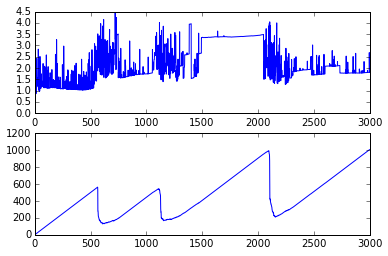

0.489599453937
0.447342161295
0.481225864219


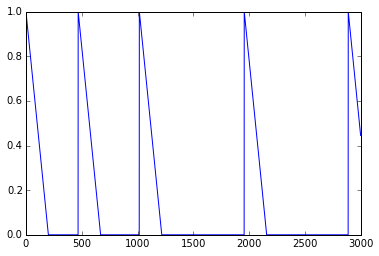

In [49]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * S(x - cusum[i - 1])
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

Populating the interactive namespace from numpy and matplotlib
[ 903.  699.  422.  430.  797.]
[  903.  1602.  2024.  2454.  3251.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


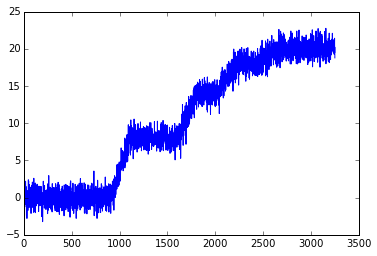

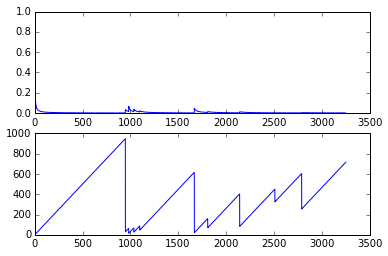

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


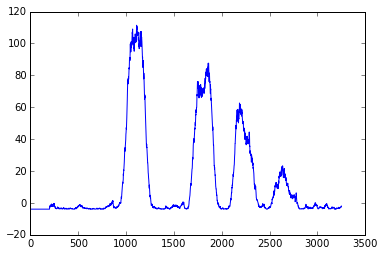

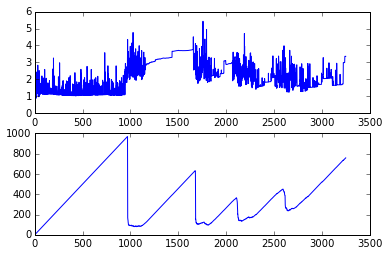

0.662706410197
0.489903994024
0.592678765214


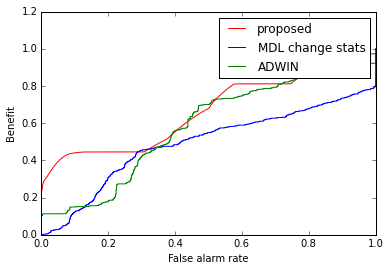

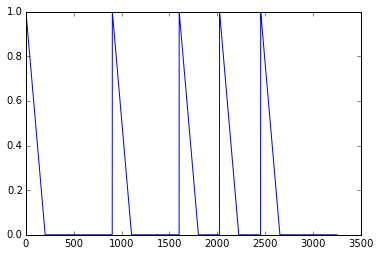

In [54]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * S(x - cusum[i - 1])
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#平均の列を作成
mu = np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    mu[i] =  2* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] + mu[i]
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
score3 = size3[1]
#score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)

In [61]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * S(x - cusum[i - 1])
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

aucs = np.zeros((3, 20))
for k in range(0, 20):
    #変化幅を乱数で変える
    n = 5
    change_step = np.zeros(n)
    cusum = np.zeros(n)
    change_step[0] = rn.randint(1,1000)
    cusum[0] = change_step[0]
    for i in range(1,n):
        change_step[i] = rn.randint(1,1000)
        cusum[i] = cusum[i-1] + change_step[i]

    #平均の列を作成
    mu = np.zeros(cusum[n-1])
    for i in range(0, int(cusum[n-1])):
        mu[i] =  2* I(i)

    # generate data
    rng = np.random.RandomState(123)
    data = rng.normal(size=int(cusum[n-1]))
    for i in range(0, int(cusum[n-1])):
        data[i] = data[i] + mu[i]

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2)
    score = ev.InvRunLen(size[0])
    #score = size[1]

    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
    score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = size3[1]
    #score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # 変化点は0を含む
    # benefit は 三角形
    T = 200
    #t_true = cusum[:(n-1)]
    t = np.ndarray.tolist(cusum[:(n-1)])
    t_true = [0]
    t_true = t_true + t
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs[0, k] = auc(x, y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs[1, k] = auc(x2, y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e3 = ev.B(score3, beta, t_true, T)
        f3  = ev.N(score3, beta, t_true, T)
        g3 = ev.supB(score3, t_true, T)
        h3 = ev.supN(score3, t_true, T)
        x3.append(f3/h3)
        y3.append(e3/g3)
    aucs[2, k] = auc(x3, y3)

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:60: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Populating the interactive namespace from numpy and matplotlib


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:61: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


KeyboardInterrupt: 

In [62]:
aucs

array([[ 0.53190888,  0.63376661,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.55305826,  0.48660061,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.65325167,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

多重変化(分散、gradual)

Populating the interactive namespace from numpy and matplotlib
[ 118.  121.  977.  239.  233.]
[  118.   239.  1216.  1455.  1688.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


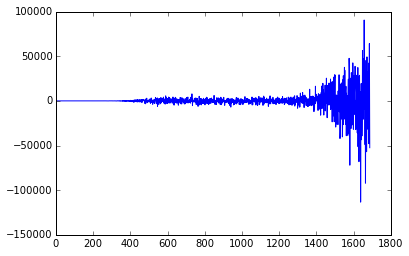

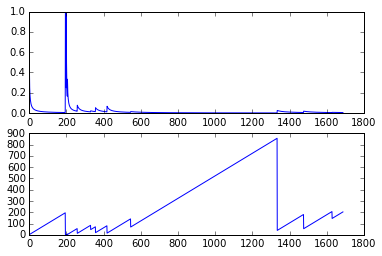

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


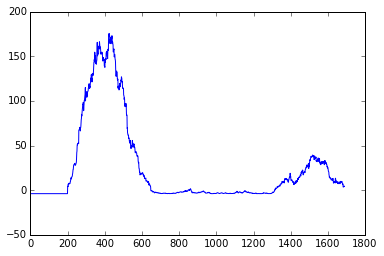

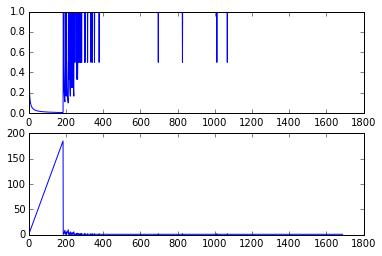

0.737889626124
0.470449564392
0.314017233538


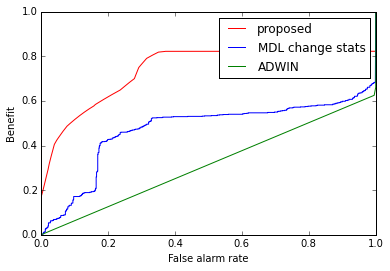

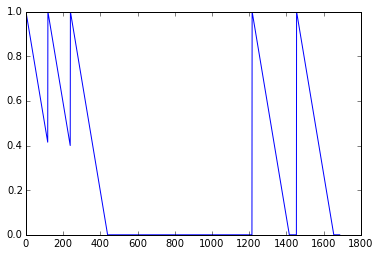

In [56]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 2 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


Populating the interactive namespace from numpy and matplotlib
[ 686.   16.  794.  883.  512.]
[  686.   702.  1496.  2379.  2891.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


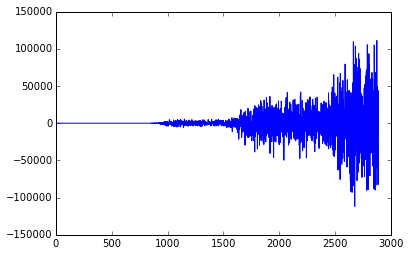

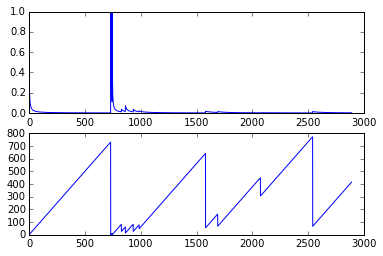

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


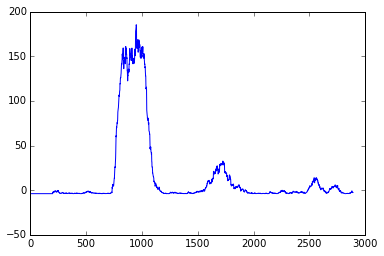

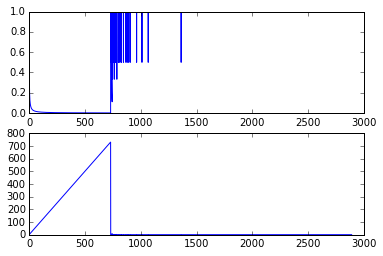

0.498015001068
0.5011058994
0.44822241241


In [57]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 2 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


Populating the interactive namespace from numpy and matplotlib
[ 402.  749.  695.  477.  511.]
[  402.  1151.  1846.  2323.  2834.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


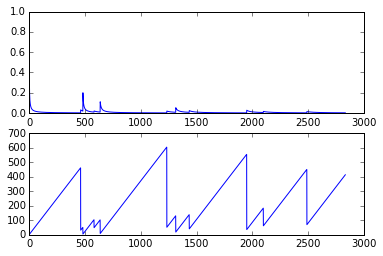

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


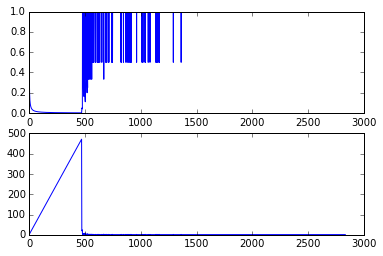

0.439502072516
0.372886309999
0.385182772072


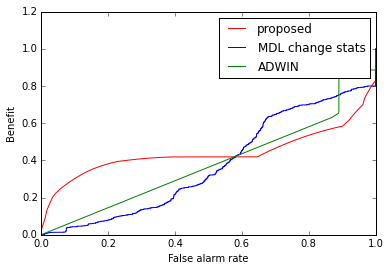

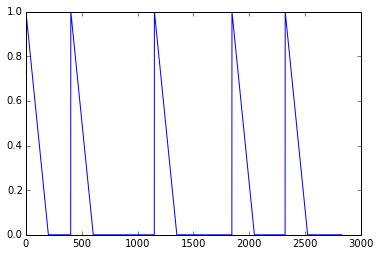

In [58]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 2 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


Populating the interactive namespace from numpy and matplotlib
[ 468.  140.  941.   16.  384.]
[  468.   608.  1549.  1565.  1949.]


/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


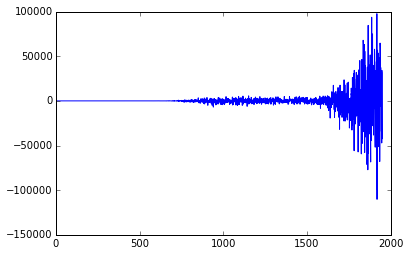

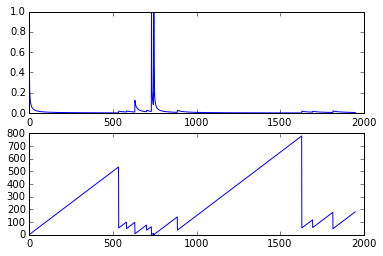

/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:68: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/kanekoryoya/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:69: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


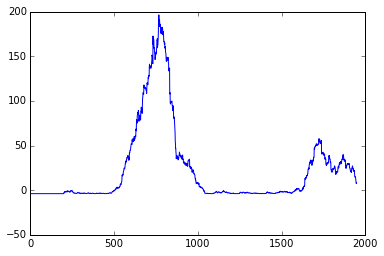

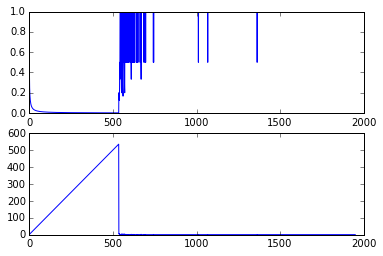

0.675692740209
0.577252764006
0.402659692255


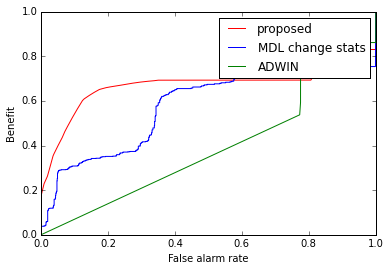

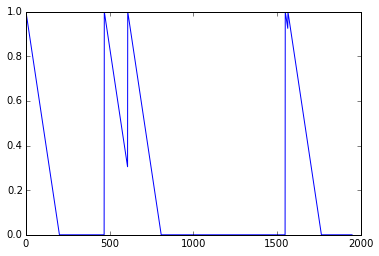

In [59]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#変化幅を乱数で変える
n = 5
change_step = np.zeros(n)
cusum = np.zeros(n)
change_step[0] = rn.randint(1,1000)
cusum[0] = change_step[0]
for i in range(1,n):
    change_step[i] = rn.randint(1,1000)
    cusum[i] = cusum[i-1] + change_step[i]
print(change_step)
print(cusum)

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 300:
        return x / 300
    else:
        return 1
    
def I(x):
    s = 0
    for i in range(1, 5):
#        s = s  +  1 * S(x - cusum[i - 1]) ###
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

#分散の列を作成
sigma= np.zeros(cusum[n-1])
for i in range(0, int(cusum[n-1])):
    sigma[i] =  1* I(i)

# generate data
rng = np.random.RandomState(123)
data = rng.normal(size=int(cusum[n-1]))
for i in range(0, int(cusum[n-1])):
    data[i] = data[i] * 2 * np.exp(sigma[i])
plt.figure(1)
plt.plot(data)

plt.figure(2)
#calculate scores
ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
size = ins.transform(X=data, epsilon = 2)
score = ev.InvRunLen(size[0])
#score = size[1]
f, a = plt.subplots(2, 1)
a[0].plot(score)
a[1].plot(size[0])
plt.show()

plt.figure(3)
stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
score2 = stat.transform(X=data)
score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]
plt.plot(score2_)
plt.show()

plt.figure(4)
ins = adwin.ADWIN(a=1)
size3 = ins.transform(X=data, delta = 0.5)
#score3 = size3[1]
score3 = ev.InvRunLen(size3[0])
f, a = plt.subplots(2, 1)
a[0].plot(score3)
a[1].plot(size3[0])
plt.show()

# plot ROC curves
# ADWIN, proposedのscoreはinverse run length
# 変化点は0を含む
# benefit は 三角形
T = 200
#t_true = cusum[:(n-1)]
t = np.ndarray.tolist(cusum[:(n-1)])
t_true = [0]
t_true = t_true + t
plt.figure(5)
x = []
y = []
p = [min(score)-1] + sorted(score)
for beta in p:
    e = ev.B(score, beta, t_true, T)
    f  = ev.N(score, beta, t_true, T)
    g = ev.supB(score, t_true, T)
    h = ev.supN(score, t_true, T)
    x.append(f/h)
    y.append(e/g)
print(auc(x,y))
plt.plot(x,y, color = 'red', label = 'proposed')

x2 = []
y2 = []
p = [min(score2_) - 1] + sorted(score2_)
for beta in p:
    e2 = ev.B(score2_, beta, t_true, T)
    f2  = ev.N(score2_, beta, t_true, T)
    g2 = ev.supB(score2_, t_true, T)
    h2 = ev.supN(score2_, t_true, T)
    x2.append(f2/h2)
    y2.append(e2/g2)
print(auc(x2,y2))
plt.plot(x2,y2, color = 'blue',label = 'MDL change stats')

x3 = []
y3 = []
p = [min(score3) - 1] + sorted(score3)
for beta in p:
    e3 = ev.B(score3, beta, t_true, T)
    f3  = ev.N(score3, beta, t_true, T)
    g3 = ev.supB(score3, t_true, T)
    h3 = ev.supN(score3, t_true, T)
    x3.append(f3/h3)
    y3.append(e3/g3)
print(auc(x3, y3))
plt.plot(x3, y3, color = 'green', label = 'ADWIN')
plt.ylim(0,1)
plt.legend(loc="best")
plt.xlabel("False alarm rate")
plt.ylabel("Benefit")
plt.show()

plt.figure(5)
b = ev.benefit(score, t_true, T)
plt.plot(b)


In [ ]:
%pylab inline --no-import-all
import numpy as np
import mdlcpstat_adwin as mdladwn
import mdlcpstat_adwin2 as mdladwn2
import mdlcpstat_adwin3 as mdladwn3
import mdlcpstat as mdl
import matplotlib.pyplot as plt
import evaluation as ev
from sklearn.metrics import roc_curve, auc
import adwin
import random as rn

#関数の準備
def S(x):
    if x < 0:
        return 0
    elif 0 <= x < 200:
        return x / 200
    else:
        return 1

def I(x):
    s = 0
    for i in range(1, 5):
#        s = s +  1 * S(x - cusum[i - 1])
        s = s + (5-i) * S(x - cusum[i - 1])
    return s

aucs2 = np.zeros((3, 20))
for k in range(0, 20):
    #変化幅を乱数で変える
    n = 5
    change_step = np.zeros(n)
    cusum = np.zeros(n)
    change_step[0] = rn.randint(1,1000)
    cusum[0] = change_step[0]
    for i in range(1,n):
        change_step[i] = rn.randint(1,1000)
        cusum[i] = cusum[i-1] + change_step[i]

    #分散の列を作成
    sigma= np.zeros(cusum[n-1])
    for i in range(0, int(cusum[n-1])):
        sigma[i] =  1* I(i)

    # generate data
    rng = np.random.RandomState(123)
    data = rng.normal(size=int(cusum[n-1]))
    for i in range(0, int(cusum[n-1])):
        data[i] = data[i] * 4 * np.exp(sigma[i])

    #calculate scores
    ins = mdladwn3.MDLCPStat_adwin(lossfunc=mdladwn3.lnml_gaussian)
    size = ins.transform(X=data, epsilon = 2)
    score = ev.InvRunLen(size[0])
    #score = size[1]

    stat = mdl.MDLCPStat(h=100, lossfunc=mdl.loss_gaussian, fill_blank="online")
    score2 = stat.transform(X=data)
    score2_ = np.ones(cusum[n-1]) * (min(score2[200:cusum[n-1]]))
    score2_[200:cusum[n-1]] = score2[200:cusum[n-1]]

    ins = adwin.ADWIN(a=1)
    size3 = ins.transform(X=data, delta = 0.5)
    score3 = size3[1]
    #score3 = ev.InvRunLen(size3[0])

    # plot ROC curves
    # ADWIN, proposedのscoreはinverse run length
    # 変化点は0を含む
    # benefit は 三角形
    T = 200
    #t_true = cusum[:(n-1)]
    t = np.ndarray.tolist(cusum[:(n-1)])
    t_true = [0]
    t_true = t_true + t
    x = []
    y = []
    p = [min(score)-1] + sorted(score)
    for beta in p:
        e = ev.B(score, beta, t_true, T)
        f  = ev.N(score, beta, t_true, T)
        g = ev.supB(score, t_true, T)
        h = ev.supN(score, t_true, T)
        x.append(f/h)
        y.append(e/g)
    aucs2[0, k] = auc(x, y)

    x2 = []
    y2 = []
    p = [min(score2_) - 1] + sorted(score2_)
    for beta in p:
        e2 = ev.B(score2_, beta, t_true, T)
        f2  = ev.N(score2_, beta, t_true, T)
        g2 = ev.supB(score2_, t_true, T)
        h2 = ev.supN(score2_, t_true, T)
        x2.append(f2/h2)
        y2.append(e2/g2)
    aucs2[1, k] = auc(x2, y2)

    x3 = []
    y3 = []
    p = [min(score3) - 1] + sorted(score3)
    for beta in p:
        e3 = ev.B(score3, beta, t_true, T)
        f3  = ev.N(score3, beta, t_true, T)
        g3 = ev.supB(score3, t_true, T)
        h3 = ev.supN(score3, t_true, T)
        x3.append(f3/h3)
        y3.append(e3/g3)
    aucs2[2, k] = auc(x3, y3)